## Credit Card Fraud Detection - Support Vector Machine Classification

### Libraries

In [2]:
import pandas as pd
import numpy as np
import  seaborn as sns
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler

### Load Dataset

In [3]:
data = pd.read_csv('creditcard.csv')
data.head()

,Time,V1,V2,V3,V4,V5,V6,V7,V8,V9,...,V21,V22,V23,V24,V25,V26,V27,V28,Amount,Class
0,0.0,-1.359807,-0.072781,2.536347,1.378155,-0.338321,0.462388,0.239599,0.098698,0.363787,...,-0.018307,0.277838,-0.110474,0.066928,0.128539,-0.189115,0.133558,-0.021053,149.62,0
1,0.0,1.191857,0.266151,0.166480,0.448154,0.060018,-0.082361,-0.078803,0.085102,-0.255425,...,-0.225775,-0.638672,0.101288,-0.339846,0.167170,0.125895,-0.008983,0.014724,2.69,0
2,1.0,-1.358354,-1.340163,1.773209,0.379780,-0.503198,1.800499,0.791461,0.247676,-1.514654,...,0.247998,0.771679,0.909412,-0.689281,-0.327642,-0.139097,-0.055353,-0.059752,378.66,0
3,1.0,-0.966272,-0.185226,1.792993,-0.863291,-0.010309,1.247203,0.237609,0.377436,-1.387024,...,-0.108300,0.005274,-0.190321,-1.175575,0.647376,-0.221929,0.062723,0.061458,123.50,0
4,2.0,-1.158233,0.877737,1.548718,0.403034,-0.407193,0.095921,0.592941,-0.270533,0.817739,...,-0.009431,0.798278,-0.137458,0.141267,-0.206010,0.502292,0.219422,0.215153,69.99,0


### About Dataset

In [5]:
data.shape

(284807, 31)

In [6]:
data['Class'].value_counts()

0    284315
1       492
Name: Class, dtype: int64

In [18]:
data.isnull().sum()

Time      0
V1        0
V2        0
V3        0
V4        0
V5        0
V6        0
V7        0
V8        0
V9        0
V10       0
V11       0
V12       0
V13       0
V14       0
V15       0
V16       0
V17       0
V18       0
V19       0
V20       0
V21       0
V22       0
V23       0
V24       0
V25       0
V26       0
V27       0
V28       0
Amount    0
Class     0
dtype: int64

In [19]:
data.isnull().values.sum()

0

### Data Visualization

In [20]:
data["Class"].describe()

count    284807.000000
mean          0.001727
std           0.041527
min           0.000000
25%           0.000000
50%           0.000000
75%           0.000000
max           1.000000
Name: Class, dtype: float64

### Pie-Plot

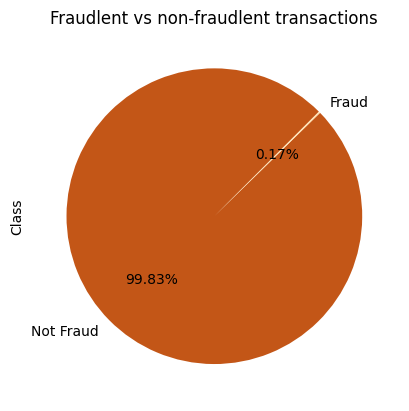

0    284315
1       492
Name: Class, dtype: int64


In [4]:
plt.title("Fraudlent vs non-fraudlent transactions")
data['Class'].value_counts().plot(kind='pie',autopct="%.2f%%",labels=['Not Fraud','Fraud'],
                                 startangle=45,colors=['#C35617','#FFDEAD'])
plt.show()
print(data.Class.value_counts())

### Count Plot

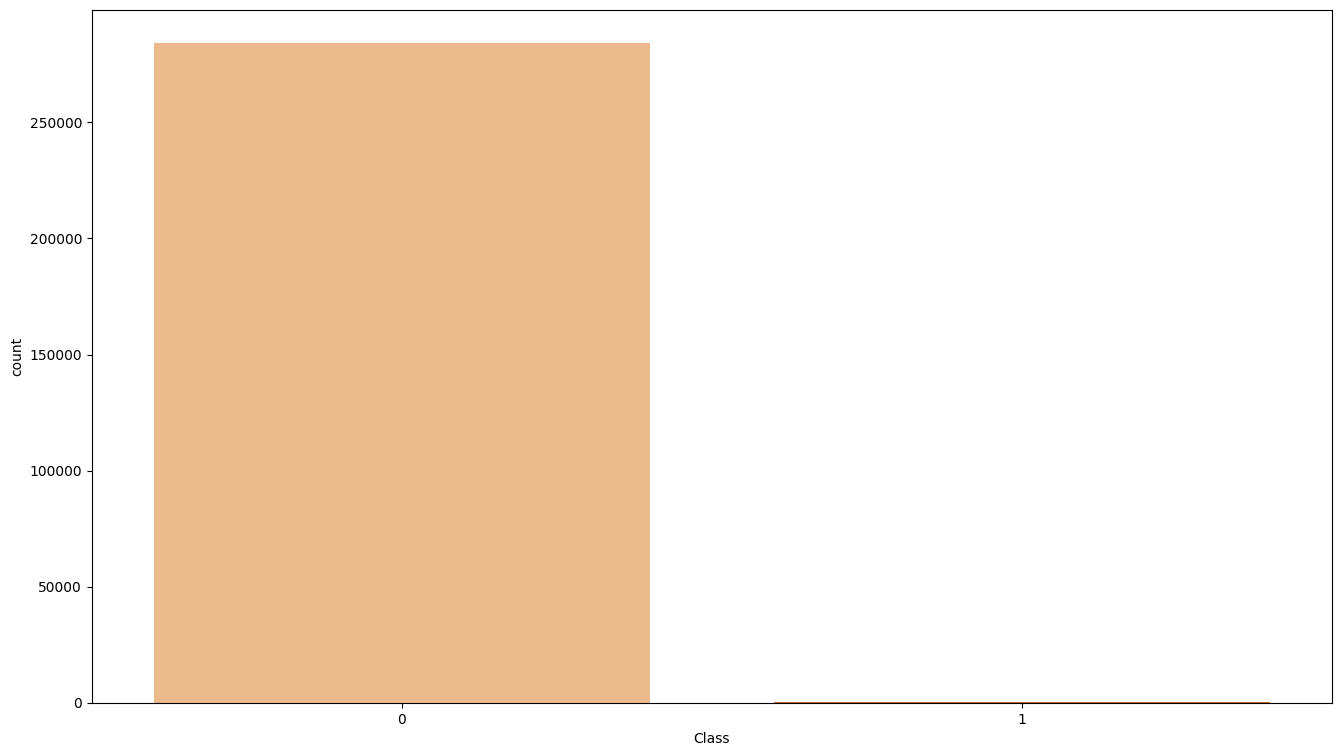

0    284315
1       492
Name: Class, dtype: int64


In [5]:
plt.figure(figsize=(16,9))
sns.countplot(x = 'Class', data = data, palette = 'Oranges')
plt.show();

print(data['Class'].value_counts())

In [6]:
print ("Fraud")
print (data.Time[data.Class == 1].describe())
print ()
print ("Not Fraud")
print (data.Time[data.Class == 0].describe())

Fraud
count       492.000000
mean      80746.806911
std       47835.365138
min         406.000000
25%       41241.500000
50%       75568.500000
75%      128483.000000
max      170348.000000
Name: Time, dtype: float64

Not Fraud
count    284315.000000
mean      94838.202258
std       47484.015786
min           0.000000
25%       54230.000000
50%       84711.000000
75%      139333.000000
max      172792.000000
Name: Time, dtype: float64


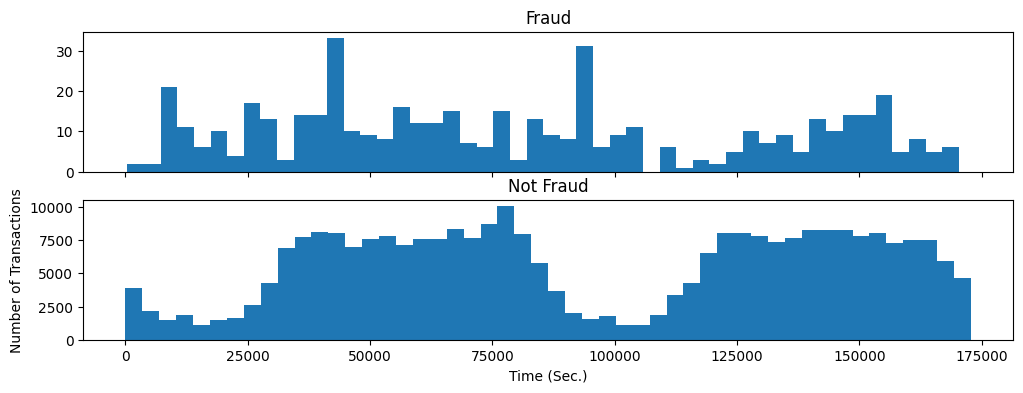

In [14]:
f, (ax1, ax2) = plt.subplots(2, 1, sharex=True, figsize=(12,4))
bins = 50

ax1.hist(data.Time[data.Class == 1], bins = bins)
ax1.set_title('Fraud')

ax2.hist(data.Time[data.Class == 0], bins = bins)
ax2.set_title('Not Fraud')

plt.xlabel('Time (Sec.)')
plt.ylabel('Number of Transactions')
plt.show();

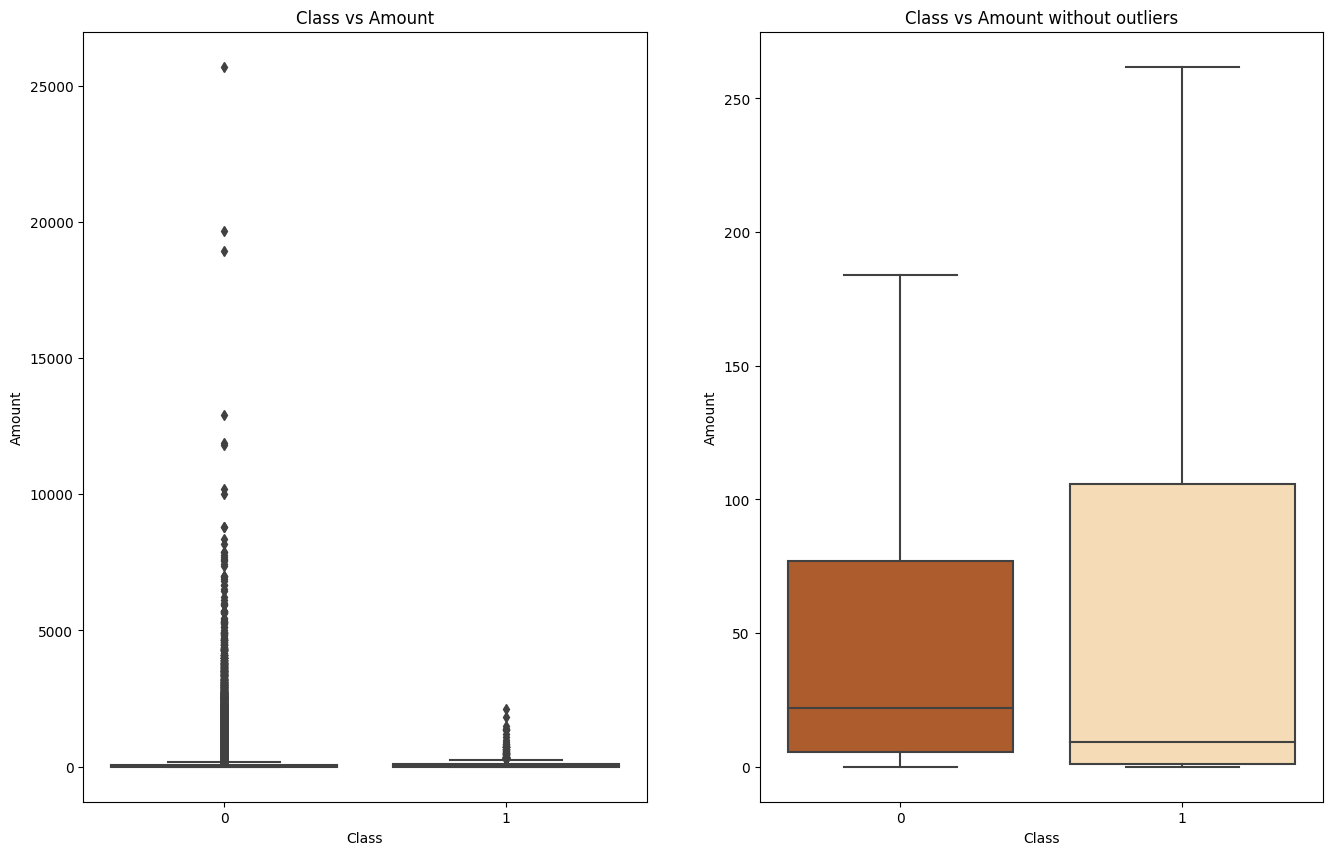

In [15]:
f, axes = plt.subplots(ncols=2, figsize=(16,10))
colors = ['#C35617', '#FFDEAD']

sns.boxplot(x="Class", y="Amount", data=data, palette = colors, ax=axes[0], showfliers=True)
axes[0].set_title('Class vs Amount')

sns.boxplot(x="Class", y="Amount", data=data, palette = colors, ax=axes[1], showfliers=False)
axes[1].set_title('Class vs Amount without outliers')

plt.show();

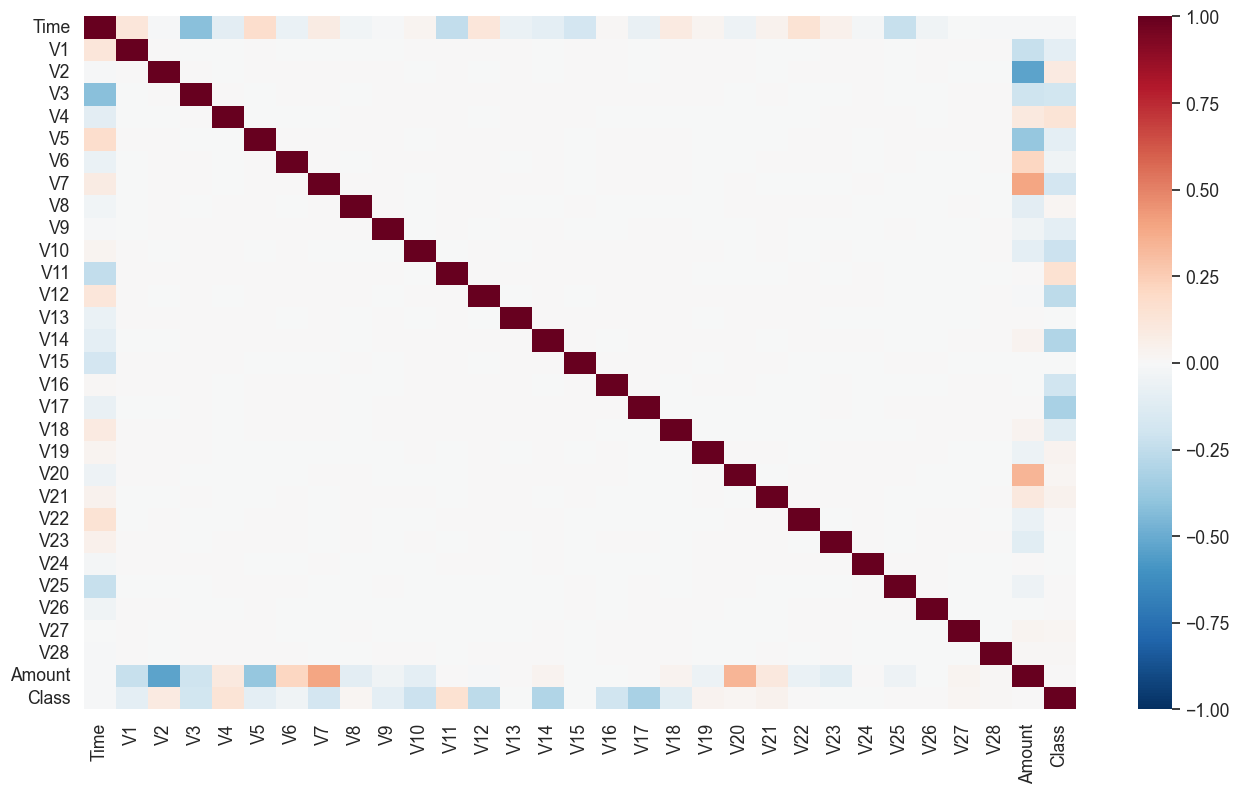

In [16]:
sns.set(font_scale=1.15)
plt.figure(figsize=(16, 9))
sns.heatmap(data.corr(), cmap='RdBu_r', vmin=-1, vmax=1);

In [7]:
corr_matrix = data.corr(method = "pearson" )
corr_matrix.style.background_gradient(cmap='Oranges')

,Time,V1,V2,V3,V4,V5,V6,V7,V8,V9,V10,V11,V12,V13,V14,V15,V16,V17,V18,V19,V20,V21,V22,V23,V24,V25,V26,V27,V28,Amount,Class
Time,1.000000,0.117396,-0.010593,-0.419618,-0.105260,0.173072,-0.063016,0.084714,-0.036949,-0.008660,0.030617,-0.247689,0.124348,-0.065902,-0.098757,-0.183453,0.011903,-0.073297,0.090438,0.028975,-0.050866,0.044736,0.144059,0.051142,-0.016182,-0.233083,-0.041407,-0.005135,-0.009413,-0.010596,-0.012323
V1,0.117396,1.000000,0.000000,-0.000000,-0.000000,0.000000,-0.000000,-0.000000,-0.000000,-0.000000,0.000000,0.000000,0.000000,-0.000000,-0.000000,0.000000,0.000000,-0.000000,0.000000,0.000000,0.000000,-0.000000,-0.000000,0.000000,-0.000000,-0.000000,-0.000000,0.000000,0.000000,-0.227709,-0.101347
V2,-0.010593,0.000000,1.000000,0.000000,-0.000000,0.000000,0.000000,0.000000,-0.000000,0.000000,-0.000000,0.000000,-0.000000,0.000000,-0.000000,-0.000000,0.000000,-0.000000,0.000000,-0.000000,0.000000,-0.000000,0.000000,0.000000,0.000000,-0.000000,0.000000,-0.000000,-0.000000,-0.531409,0.091289
V3,-0.419618,-0.000000,0.000000,1.000000,0.000000,-0.000000,0.000000,0.000000,-0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,-0.000000,0.000000,-0.000000,-0.000000,0.000000,-0.000000,-0.000000,0.000000,0.000000,-0.210880,-0.192961
V4,-0.105260,-0.000000,-0.000000,0.000000,1.000000,-0.000000,-0.000000,-0.000000,0.000000,0.000000,0.000000,0.000000,-0.000000,0.000000,0.000000,0.000000,-0.000000,-0.000000,-0.000000,-0.000000,-0.000000,-0.000000,-0.000000,0.000000,0.000000,0.000000,-0.000000,0.000000,-0.000000,0.098732,0.133447
V5,0.173072,0.000000,0.000000,-0.000000,-0.000000,1.000000,0.000000,0.000000,0.000000,0.000000,-0.000000,0.000000,0.000000,0.000000,0.000000,-0.000000,0.000000,0.000000,0.000000,-0.000000,-0.000000,-0.000000,0.000000,-0.000000,-0.000000,0.000000,0.000000,0.000000,-0.000000,-0.386356,-0.094974
V6,-0.063016,-0.000000,0.000000,0.000000,-0.000000,0.000000,1.000000,0.000000,-0.000000,0.000000,0.000000,0.000000,0.000000,-0.000000,0.000000,-0.000000,0.000000,0.000000,0.000000,-0.000000,-0.000000,0.000000,-0.000000,0.000000,-0.000000,0.000000,-0.000000,-0.000000,0.000000,0.215981,-0.043643
V7,0.084714,-0.000000,0.000000,0.000000,-0.000000,0.000000,0.000000,1.000000,0.000000,0.000000,-0.000000,0.000000,-0.000000,0.000000,0.000000,-0.000000,0.000000,0.000000,0.000000,-0.000000,0.000000,-0.000000,-0.000000,-0.000000,0.000000,-0.000000,-0.000000,-0.000000,-0.000000,0.397311,-0.187257
V8,-0.036949,-0.000000,-0.000000,-0.000000,0.000000,0.000000,-0.000000,0.000000,1.000000,0.000000,-0.000000,0.000000,0.000000,-0.000000,-0.000000,0.000000,-0.000000,-0.000000,-0.000000,-0.000000,0.000000,0.000000,0.000000,0.000000,-0.000000,-0.000000,-0.000000,0.000000,-0.000000,-0.103079,0.019875
V9,-0.008660,-0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,-0.000000,0.000000,-0.000000,0.000000,0.000000,-0.000000,-0.000000,0.000000,0.000000,-0.000000,-0.000000,0.000000,-0.000000,-0.000000,-0.000000,0.000000,-0.000000,-0.000000,0.000000,-0.044246,-0.097733


In [8]:
cor_target = data.corrwith(data["Class"])
cor_target.sort_values(axis = 0, ascending = False)

Class     1.000000
V11       0.154876
V4        0.133447
V2        0.091289
V21       0.040413
V19       0.034783
V20       0.020090
V8        0.019875
V27       0.017580
V28       0.009536
Amount    0.005632
V26       0.004455
V25       0.003308
V22       0.000805
V23      -0.002685
V15      -0.004223
V13      -0.004570
V24      -0.007221
Time     -0.012323
V6       -0.043643
V5       -0.094974
V9       -0.097733
V1       -0.101347
V18      -0.111485
V7       -0.187257
V3       -0.192961
V16      -0.196539
V10      -0.216883
V12      -0.260593
V14      -0.302544
V17      -0.326481
dtype: float64

In [9]:
# Creating fraudulent dataframe
data_fraud = data[data['Class'] == 1]
# Creating non fraudulent dataframe
data_non_fraud = data[data['Class'] == 0]


In [10]:
data.drop('Time', axis=1, inplace=True)

In [8]:
data.head()

,V1,V2,V3,V4,V5,V6,V7,V8,V9,V10,...,V21,V22,V23,V24,V25,V26,V27,V28,Amount,Class
0,-1.359807,-0.072781,2.536347,1.378155,-0.338321,0.462388,0.239599,0.098698,0.363787,0.090794,...,-0.018307,0.277838,-0.110474,0.066928,0.128539,-0.189115,0.133558,-0.021053,149.62,0
1,1.191857,0.266151,0.166480,0.448154,0.060018,-0.082361,-0.078803,0.085102,-0.255425,-0.166974,...,-0.225775,-0.638672,0.101288,-0.339846,0.167170,0.125895,-0.008983,0.014724,2.69,0
2,-1.358354,-1.340163,1.773209,0.379780,-0.503198,1.800499,0.791461,0.247676,-1.514654,0.207643,...,0.247998,0.771679,0.909412,-0.689281,-0.327642,-0.139097,-0.055353,-0.059752,378.66,0
3,-0.966272,-0.185226,1.792993,-0.863291,-0.010309,1.247203,0.237609,0.377436,-1.387024,-0.054952,...,-0.108300,0.005274,-0.190321,-1.175575,0.647376,-0.221929,0.062723,0.061458,123.50,0
4,-1.158233,0.877737,1.548718,0.403034,-0.407193,0.095921,0.592941,-0.270533,0.817739,0.753074,...,-0.009431,0.798278,-0.137458,0.141267,-0.206010,0.502292,0.219422,0.215153,69.99,0


### Train-Test-Split

In [11]:
#putting feature variables(independent variables) into X
X = data.drop(['Class'], axis=1)
# Putting target variable(dependent variable) to y
y = data['Class']

In [12]:
from sklearn.model_selection import train_test_split
X_train,X_test,y_train,y_test=train_test_split(X,y,test_size=0.2,stratify=y,random_state=42)

In [13]:
from sklearn.preprocessing import StandardScaler
#removes the mean and scales each feature/variable to unit variance
#StandardScaler can be influenced by outliers involves emphirical mean and standard deviation
scaler=StandardScaler()
X_train=scaler.fit_transform(X_train)
X_test=scaler.transform(X_test)

In [14]:
X_train.shape, y_train.shape

((227845, 29), (227845,))

In [13]:
X_test.shape, y_test.shape

((56962, 29), (56962,))

### Synthetic Minority Oversampling Technique (SMOTE)

In [15]:
from imblearn.over_sampling import SMOTE
#solves problems that occur when using an imbalanced data set
from sklearn.metrics import accuracy_score, recall_score, precision_score, f1_score, roc_auc_score
from sklearn.metrics import classification_report, confusion_matrix
#metrics for classification

In [16]:
# Instantiate SMOTE
sm = SMOTE()
# Fitting SMOTE to the train set
X_train_smote, y_train_smote = sm.fit_resample(X_train, y_train)

In [17]:
from collections import Counter
#to store dictionary keys and their counts

print('Resampled dataset shape %s' % Counter(y_train_smote))
print(X_train_smote.shape)
print(y_train_smote.shape)

Resampled dataset shape Counter({0: 227451, 1: 227451})
(454902, 29)
(454902,)


### Support Vector Machine

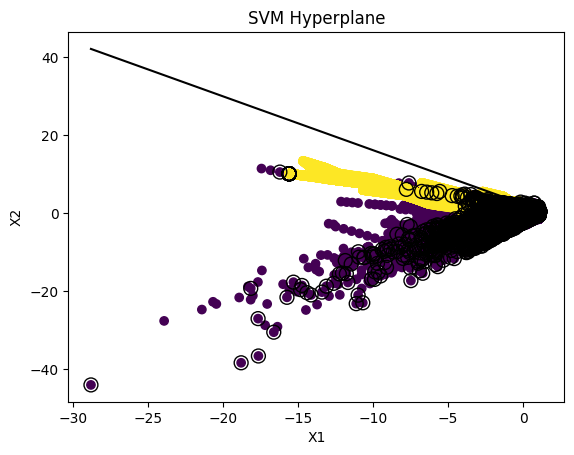

In [18]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn import svm
from sklearn.metrics import accuracy_score

# Fit the SVM model
SVM_model_smote = svm.SVC(kernel='linear', random_state=42)
SVM_model_smote.fit(X_train_smote, y_train_smote)

# Predict on training and test data
y_train_pred = SVM_model_smote.predict(X_train_smote)
y_test_pred = SVM_model_smote.predict(X_test)

# Calculate accuracy
acc_smote = accuracy_score(y_test, y_test_pred)

# Plot the decision hyperplane
# Get the hyperplane parameters
w = SVM_model_smote.coef_[0]
a = -w[0] / w[1]
xx = np.linspace(np.min(X_train_smote[:, 0]), np.max(X_train_smote[:, 0]), 100)
yy = a * xx - SVM_model_smote.intercept_[0] / w[1]

# Plot the support vectors
plt.scatter(X_train_smote[:, 0], X_train_smote[:, 1], c=y_train_smote)
plt.scatter(SVM_model_smote.support_vectors_[:, 0], SVM_model_smote.support_vectors_[:, 1],
            facecolors='none', edgecolors='k', s=100)

# Plot the decision hyperplane
plt.plot(xx, yy, 'k-')

# Set axis labels and title
plt.xlabel('X1')
plt.ylabel('X2')
plt.title('SVM Hyperplane')

# Show the plot
plt.show()


In [20]:
print('Recall score: %0.4f'% recall_score(y_train_smote, y_train_pred))
print('Precision score: %0.4f'% precision_score(y_train_smote, y_train_pred))
print('F1-Score: %0.4f'% f1_score(y_train_smote, y_train_pred))
print('Accuracy score: %0.4f'% accuracy_score(y_train_smote, y_train_pred))
print('AUC: %0.4f' % roc_auc_score(y_train_smote, y_train_pred))

Recall score: 0.9326
Precision score: 0.9705
F1-Score: 0.9512
Accuracy score: 0.9521
AUC: 0.9521


In [21]:
def Visualize_confusion_matrix(y_test, y_pred):
    cm = confusion_matrix(y_test, y_pred)
    plt.figure(figsize=(7, 5))
    sns.heatmap(cm, annot=True, fmt='g', cmap='Oranges',
                xticklabels=['No Credit Card Fraud Dection','Credit Card Fraud Dection'], 
                yticklabels=['No Credit Card Fraud Dection','Credit Card Fraud Dection'])
    plt.title('Accuracy: {0:.4f}'.format(accuracy_score(y_test, y_pred)))
    plt.ylabel('True Values')
    plt.xlabel('Predicted Values')
    plt.show()
    
    print("\n")
    print("Classification Report:")
    print(classification_report(y_test, y_pred))
    return

In [22]:
from sklearn.metrics import roc_curve
from sklearn.metrics import roc_auc_score

def ROC_AUC(Y, Y_prob):
    # caculate roc curves
    fpr, tpr, threshold = roc_curve(Y, Y_prob)
    # caculate scores
    model_auc = roc_auc_score(Y, Y_prob)
    # plot roc curve for the model
    plt.figure(figsize=(16, 9))
    plt.plot([0,1], [0,1], linestyle='--', label='No Skill')
    plt.plot(fpr, tpr, marker='.', label='Model - AUC=%.3f' % (model_auc))
    # show axis labels and the legend
    plt.xlabel('False Positive Rate')
    plt.ylabel('True Positive Rate')
    plt.legend()
    plt.show(block=False)
    return

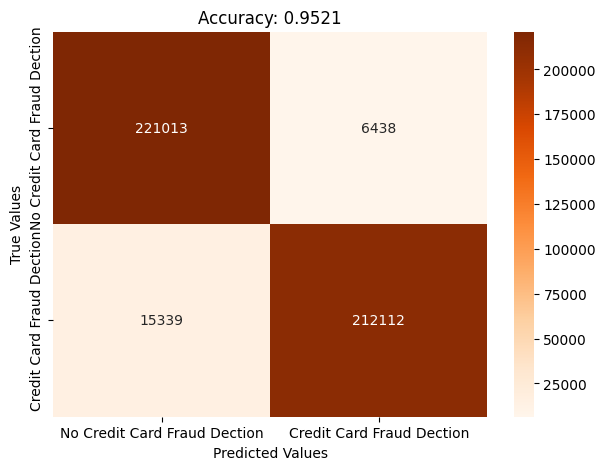



Classification Report:
              precision    recall  f1-score   support

           0       0.94      0.97      0.95    227451
           1       0.97      0.93      0.95    227451

    accuracy                           0.95    454902
   macro avg       0.95      0.95      0.95    454902
weighted avg       0.95      0.95      0.95    454902



In [23]:
Visualize_confusion_matrix(y_train_smote, y_train_pred)

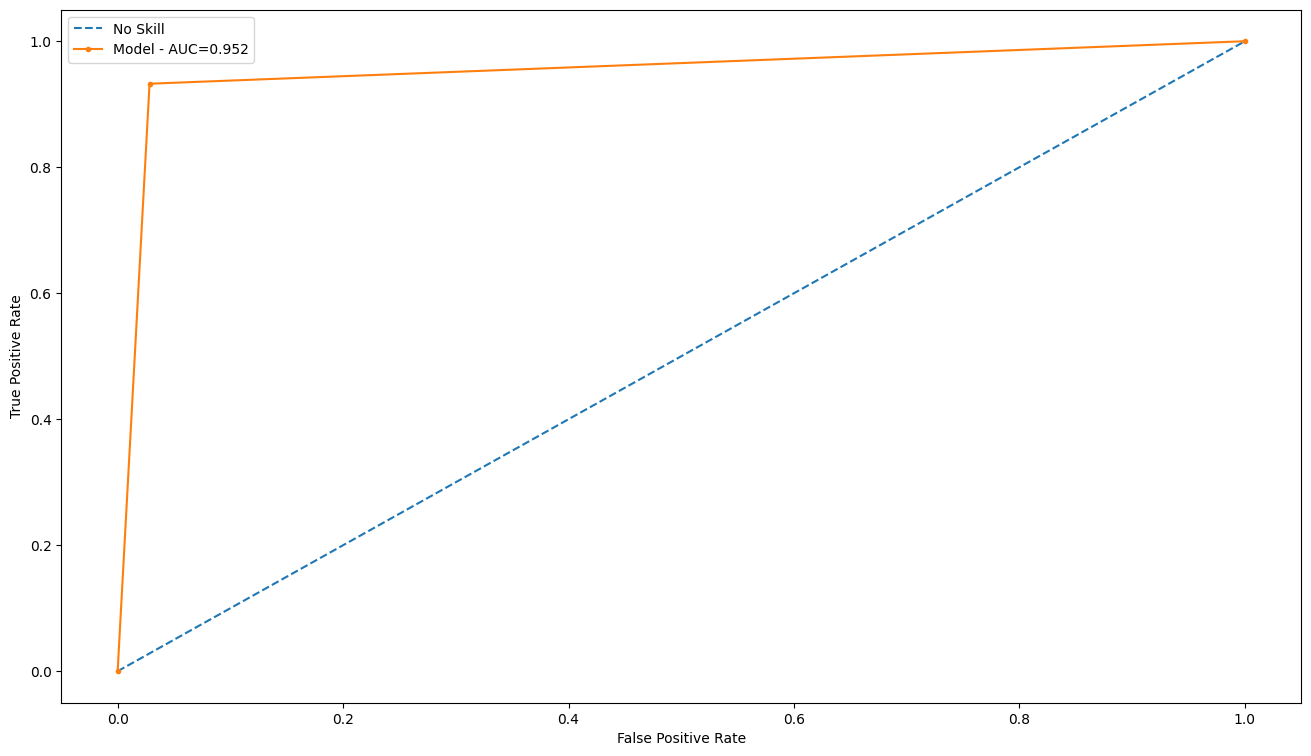

In [24]:
ROC_AUC(y_train_smote, y_train_pred)

In [25]:
print('Recall score: %0.4f'% recall_score(y_test, y_test_pred))
print('Precision score: %0.4f'% precision_score(y_test, y_test_pred))
print('F1-Score: %0.4f'% f1_score(y_test, y_test_pred))
print('Accuracy score: %0.4f'% accuracy_score(y_test, y_test_pred))
print('AUC: %0.4f' % roc_auc_score(y_test, y_test_pred))
a6=(round(recall_score(y_test, y_test_pred),4))
b6=(round(precision_score(y_test, y_test_pred),4))
c6=(round(f1_score(y_test, y_test_pred),4))
d6=(round(accuracy_score(y_test, y_test_pred),4))
e6=(round(roc_auc_score(y_test, y_test_pred),4))

Recall score: 0.9184
Precision score: 0.0520
F1-Score: 0.0985
Accuracy score: 0.9711
AUC: 0.9448


In [26]:
print(a6)
print(b6)
print(c6)
print(d6)
print(e6)

0.9184
0.052
0.0985
0.9711
0.9448


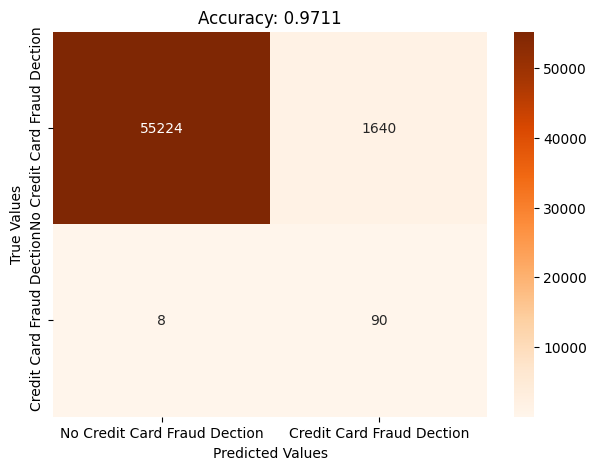



Classification Report:
              precision    recall  f1-score   support

           0       1.00      0.97      0.99     56864
           1       0.05      0.92      0.10        98

    accuracy                           0.97     56962
   macro avg       0.53      0.94      0.54     56962
weighted avg       1.00      0.97      0.98     56962



In [27]:
Visualize_confusion_matrix(y_test, y_test_pred)

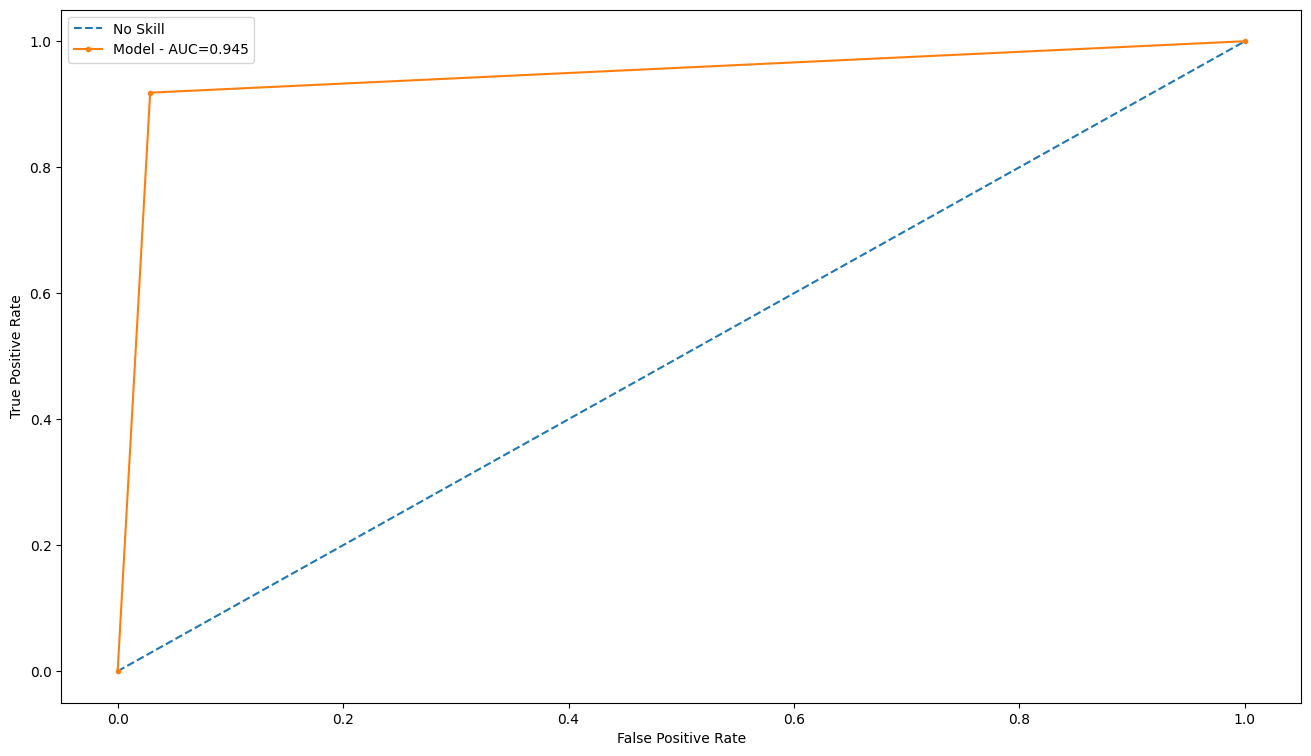

In [28]:
ROC_AUC(y_test, y_test_pred)

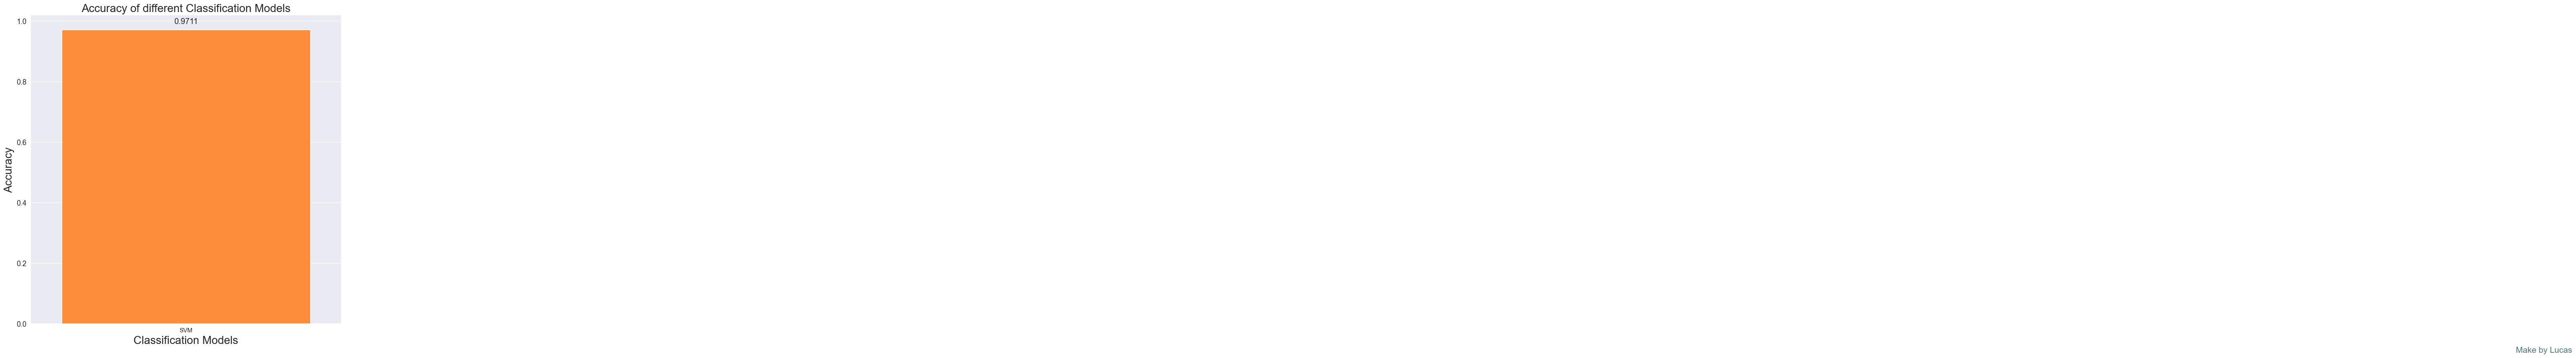

In [29]:
mylist=[]
mylist2=[]


mylist.append(acc_smote)
mylist2.append("SVM")


plt.figure(figsize=(10,10))
sns.set_style("darkgrid")
ax = sns.barplot(x = mylist2, y = mylist, palette = "Oranges", saturation =1.5)
plt.xlabel("Classification Models", fontsize = 20 )
plt.ylabel("Accuracy", fontsize = 20)
plt.title("Accuracy of different Classification Models", fontsize = 20)
plt.xticks(fontsize =11, horizontalalignment = 'center', rotation = 0)
plt.yticks(fontsize = 13)
for p in ax.patches:
    width, height = p.get_width(), p.get_height()
    x, y = p.get_xy() 
    ax.annotate(f'{height:.4}', (x + width/2, y + height*1.02), ha='center', fontsize = 'x-large')

    # Add Text watermark
    plt.text(7.5, -0.1, 'Make by Lucas', fontsize = 15,
             color ='#034235', ha ='left', va ='bottom',
             alpha = 0.7)
       
plt.show();